In [30]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
import pandas as pd

[*********************100%%**********************]  1 of 1 completed


Date
1986-03-13         NaN
1986-03-14    0.035712
1986-03-17    0.017250
1986-03-18   -0.025432
1986-03-19   -0.017390
                ...   
2024-04-26    0.018244
2024-04-29   -0.010017
2024-04-30   -0.032119
2024-05-01    0.014409
2024-05-02    0.007343
Name: Close, Length: 9612, dtype: float64


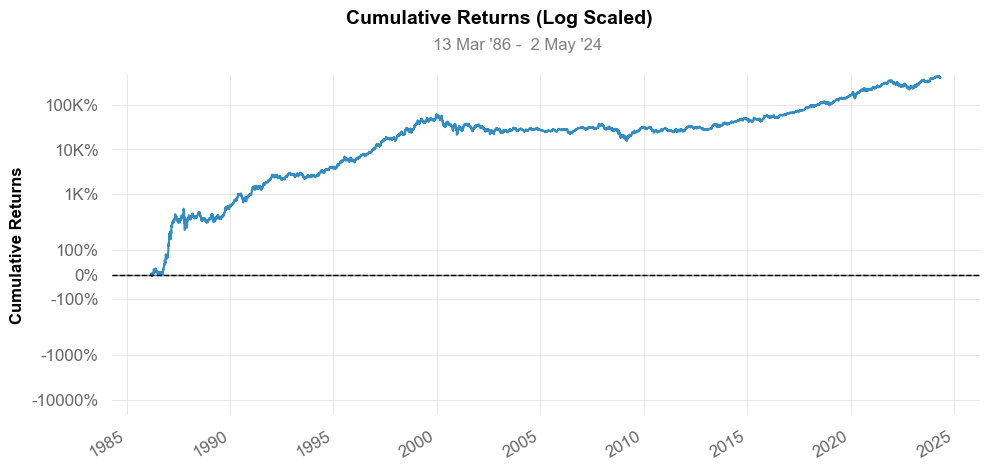

In [1]:
#Log Cumulative Returns

import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from modules import qs_functions as qsf

# Fetch returns data for MSFT using QuantStats
returns_data = qs.utils.download_returns('MSFT')
print(returns_data)
qs_log_returns = qs.plots.log_returns(returns_data)

# Calculate cumulative returns
cumulative_returns = (1 + returns_data).cumprod() *100

# Create a Plotly figure
fig = go.Figure()

# Add a scatter trace for the cumulative returns data
fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns, mode='lines', name='Cumulative Returns '))

# Set the title and axis labels
fig.update_layout(title='Cumulative Returns (Log Scaled)', xaxis_title='Date', yaxis_title='Cumulative Returns')

# Set the y-axis to a logarithmic scale, specify tick values and text, and ensure the negative part is always visible
fig.update_yaxes(type='log', tickvals=[-1000000, -100000, -10000, -1000, -100, 0, 100, 1000, 10000, 100000, 1000000], 
                 ticktext=['-1 mil%', '-100k%', '-10k%', '-1k%', '-100%', '0', '100%', '1k%', '10k%', '100k%', '1 mil%'])
# Show the figure
fig.show()


[*********************100%%**********************]  1 of 1 completed


Date
1986-03-13         NaN
1986-03-14    0.035712
1986-03-17    0.017250
1986-03-18   -0.025432
1986-03-19   -0.017390
                ...   
2024-04-26    0.018244
2024-04-29   -0.010017
2024-04-30   -0.032119
2024-05-01    0.014409
2024-05-02    0.007343
Name: Close, Length: 9612, dtype: float64


[*********************100%%**********************]  1 of 1 completed


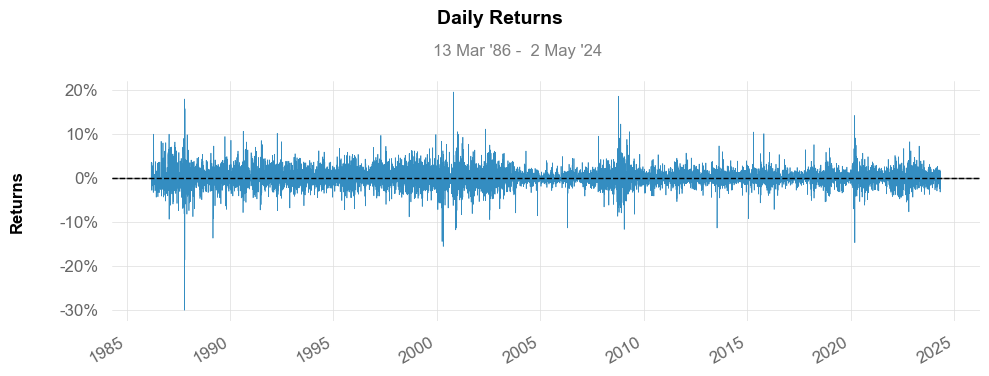

In [3]:
#Daily Returns

import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from modules import qs_functions as qsf

# Fetch returns data for MSFT using QuantStats
returns_data = qs.utils.download_returns('MSFT')
print(returns_data)

spy_data = qs.utils.download_returns('SPY')
qs_log_returns = qs.plots.daily_returns(returns_data, benchmark="SPY")

fig = go.Figure()

    # Add the daily returns plot for the stock
fig.add_trace(go.Scatter(x=returns_data.index, y=returns_data, mode='lines', name='Daily Returns', line=dict(color='blue')))

# Add the SPY data plot if spy_data is provided
if spy_data is not None:
    fig.add_trace(go.Scatter(x=spy_data.index, y=spy_data, mode='lines', name='SPY', line=dict(color='black')))

# Customize the layout
fig.update_layout(title='Daily Returns', xaxis_title='Date', yaxis_title='Returns')


[*********************100%%**********************]  1 of 1 completed
c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\core.py:1019: FutureWarning:

A valu

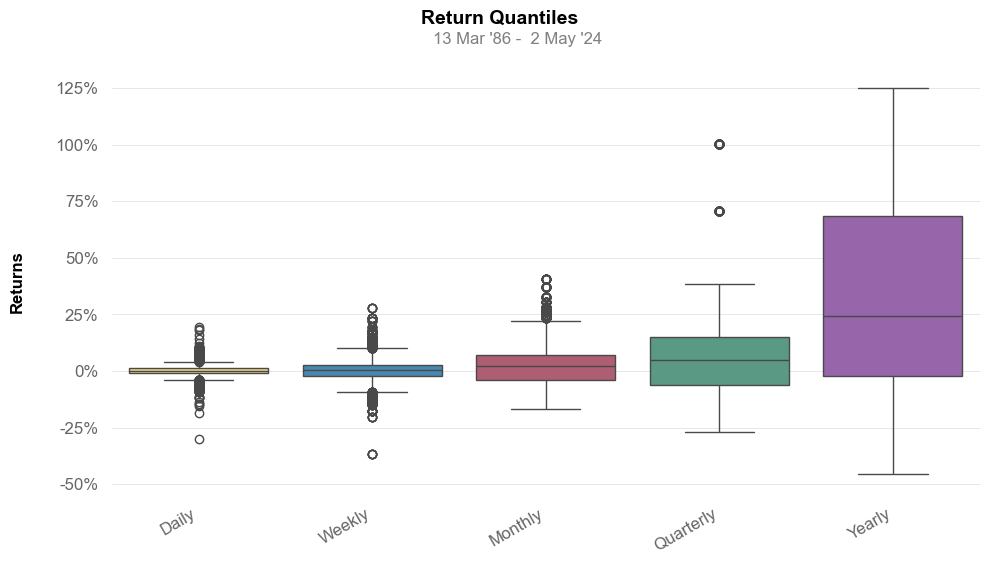

In [4]:
#Daily Distribution
#Graph looks different but the data is the same

import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from scipy.stats import norm


# Fetch returns data for MSFT using QuantStats
# Fetch daily returns data for MSFT using QuantStats
stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.distribution(returns_data)

# Convert returns to percentages
stock_percentage = stock * 100

# Calculate the average
average = np.mean(stock_percentage)

fig = go.Figure(data=go.Histogram(x=stock_percentage, nbinsx=50, histnorm='probability density', marker=dict(color='cornflowerblue'), name='Daily Returns'))


# Add a vertical line at the average
fig.add_shape(
    type="line",
    x0=average, y0=0, x1=average, y1=1,  # y1 is set to 1 to make the line span the entire y-axis
    line=dict(color="Red",width=2, dash="dot"),  # dash="dot" makes the line dotted
    yref="paper"  # This makes the y-coordinates be interpreted as a fraction of the plot's height
)
# Add a label for the line
fig.add_annotation(
    x=average, y=0.5,
    text="Average",
    showarrow=True,
    arrowhead=1,
    ax=-50,
    ay=-100,
    yref="paper"
)
# Update layout
fig.update_layout(
    title='Daily Returns Distribution',
    xaxis_title='Returns (%)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(int(stock_percentage.min()), int(stock_percentage.max())+10, 10)),
        ticktext=[f'{i}%' for i in range(int(stock_percentage.min()), int(stock_percentage.max())+10, 10)],
        range=[min(0, stock_percentage.min()), stock_percentage.max()],
    ),
    yaxis_title='Density',
    bargap=0.1 # gap between bars of adjacent location coordinates
)

# Calculate the KDE
x = np.linspace(stock_percentage.min(), stock_percentage.max(), 100)
pdf = norm.pdf(x, average, stock_percentage.std())

# Add the KDE line to the figure
fig.add_trace(go.Scatter(x=x, y=pdf, mode='lines', name='Distribution'))

fig.show()

[*********************100%%**********************]  1 of 1 completed


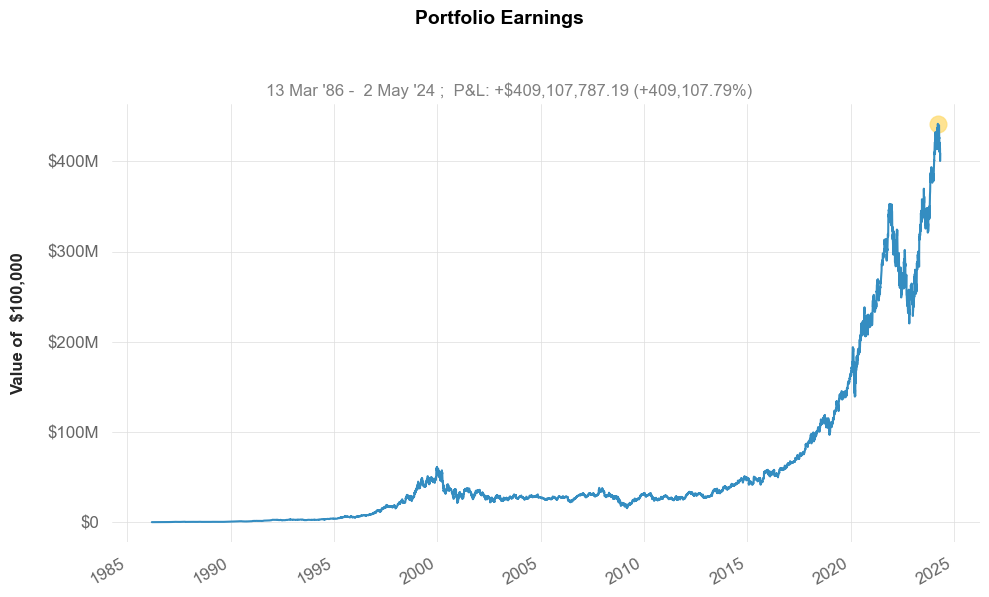

In [81]:
#Earnings
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go


# Fetch returns data for MSFT using QuantStats
stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.earnings(returns_data)

# Convert returns to growth of $1 investment over time
earnings_data = (1 + returns_data).cumprod()

# Plot the earnings
fig = go.Figure(data=go.Scatter(x=earnings_data.index, y=earnings_data, mode='lines'))
fig.update_layout(title='Earnings', xaxis_title='Date', yaxis_title='Value of $1')
fig.show()

[*********************100%%**********************]  1 of 1 completed
c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



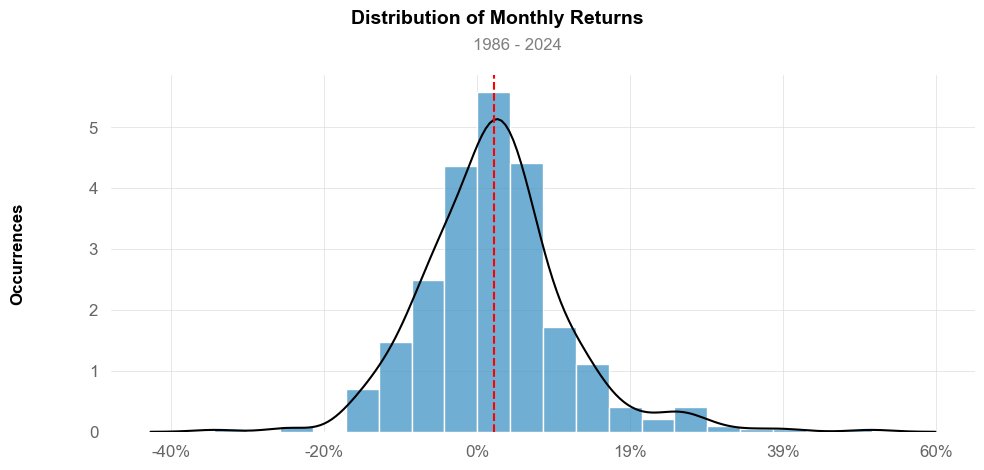

C:\Users\lmosc\AppData\Local\Temp\ipykernel_7316\2226843674.py:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [6]:
#Histogram (Now Monthly Returns Dist)
#Looks a little different but works the same

#Earnings
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from scipy.stats import norm


# Fetch returns data for MSFT using QuantStats
# Fetch daily returns data for MSFT using QuantStats
stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.histogram(returns_data)

# Convert daily returns to monthly returns
stock_monthly = stock.resample('M').apply(lambda x: (1 + x).prod() - 1)

# Convert returns to percentages
stock_percentage = stock_monthly * 100

# Calculate the average
average = np.mean(stock_percentage)

fig = go.Figure(data=go.Histogram(x=stock_percentage, nbinsx=45, histnorm='probability density', marker=dict(color='cornflowerblue'), name='Monthly Returns'))


# Add a vertical line at the average
fig.add_shape(
    type="line",
    x0=average, y0=0, x1=average, y1=1,  # y1 is set to 1 to make the line span the entire y-axis
    line=dict(color="Red",width=2, dash="dot"),  # dash="dot" makes the line dotted
    yref="paper"  # This makes the y-coordinates be interpreted as a fraction of the plot's height
)
# Add a label for the line
fig.add_annotation(
    x=average, y=0.5,
    text="Average",
    showarrow=True,
    arrowhead=1,
    ax=-50,
    ay=-100,
    yref="paper"
)
# Update layout
fig.update_layout(
    title='Monthly Returns Distribution',
    xaxis_title='Returns (%)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(int(stock_percentage.min()), int(stock_percentage.max())+10, 10)),
        ticktext=[f'{i}%' for i in range(int(stock_percentage.min()), int(stock_percentage.max())+10, 10)],
        range=[min(0, stock_percentage.min()), stock_percentage.max()],
    ),
    yaxis_title='Density',
    bargap=0.1 # gap between bars of adjacent location coordinates
)

# Calculate the KDE
x = np.linspace(stock_percentage.min(), stock_percentage.max(), 100)
pdf = norm.pdf(x, average, stock_percentage.std())

# Add the KDE line to the figure
fig.add_trace(go.Scatter(x=x, y=pdf, mode='lines', name='Distribution'))

fig.show()

In [7]:
#Monthly Returns
#No Equivalent in Quantstats
stock = qs.utils.download_returns('MSFT')


stock_monthly = stock.resample('M').apply(lambda x: (1 + x).prod() - 1)

fig = go.Figure()

# Add the monthly returns plot for the stock
fig.add_trace(go.Scatter(x=stock_monthly.index, y=stock_monthly, mode='lines', name='Monthly Returns'))

[*********************100%%**********************]  1 of 1 completed
C:\Users\lmosc\AppData\Local\Temp\ipykernel_7316\1502906052.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



[*********************100%%**********************]  1 of 1 completed


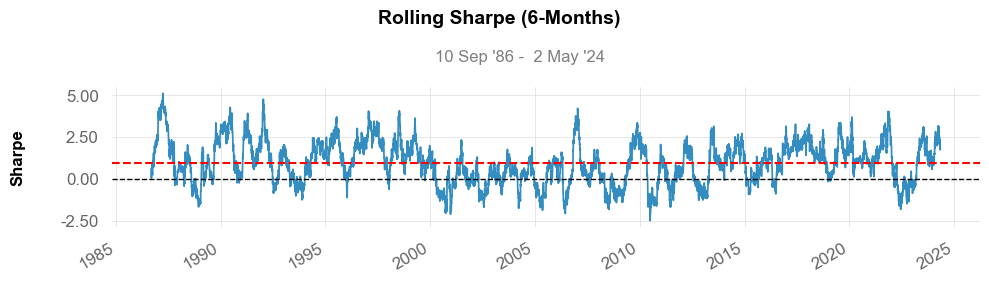

In [8]:
#Rolling Sharpe

import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from scipy.stats import norm


# Fetch returns data for MSFT using QuantStats
# Fetch daily returns data for MSFT using QuantStats
stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.rolling_sharpe(returns_data)

rolling_sharpe = qs.stats.rolling_sharpe(stock)

# Calculate the average of the Sharpe ratio
average_sharpe = rolling_sharpe.mean()

fig = go.Figure(data=go.Scatter(x=rolling_sharpe.index, y=rolling_sharpe, mode='lines'))
# Add a red dotted line at the average
fig.add_shape(
    type='line',
    x0=rolling_sharpe.index[0],
    x1=rolling_sharpe.index[-1],
    y0=average_sharpe,
    y1=average_sharpe,
    line=dict(color='Red', dash='dot')
)
fig.update_layout(title='Rolling Sharpe Ratio', xaxis_title='Date', yaxis_title='Sharpe Ratio')
fig.show()

[*********************100%%**********************]  1 of 1 completed


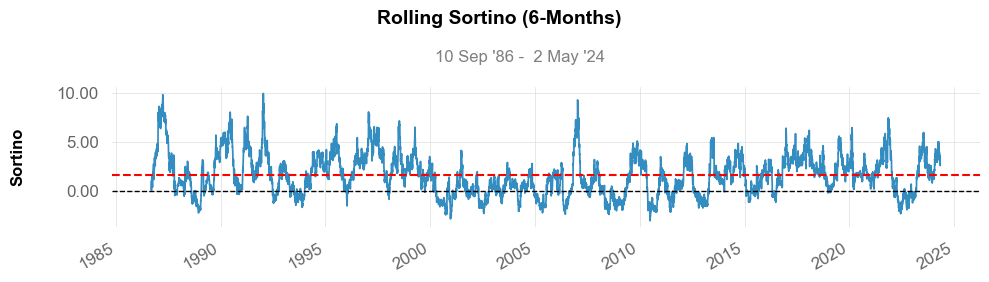

In [9]:
#Rolling Sortino

import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import plotly.graph_objects as go
from scipy.stats import norm


# Fetch returns data for MSFT using QuantStats
# Fetch daily returns data for MSFT using QuantStats
stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.rolling_sortino(returns_data)

rolling_sortino = qs.stats.rolling_sortino(stock)

# Calculate the average of the Sharpe ratio
average_sortino = rolling_sortino.mean()

fig = go.Figure(data=go.Scatter(x=rolling_sortino.index, y=rolling_sortino, mode='lines'))
# Add a red dotted line at the average
fig.add_shape(
    type='line',
    x0=rolling_sortino.index[0],
    x1=rolling_sortino.index[-1],
    y0=average_sortino,
    y1=average_sortino,
    line=dict(color='Red', dash='dot')
)
fig.update_layout(title='Rolling Sortino Ratio', xaxis_title='Date', yaxis_title='Sortino Ratio')
fig.show()

[*********************100%%**********************]  1 of 1 completed


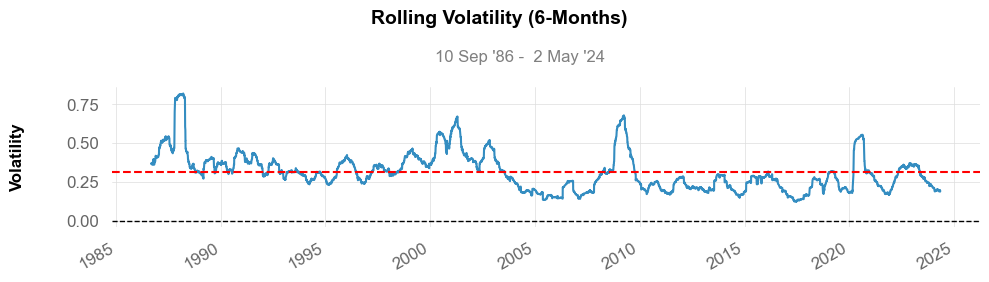

In [10]:
#Rolling Volatility

stock = qs.utils.download_returns('MSFT')
qs_daily_returns = qs.plots.rolling_volatility(returns_data)

rolling_volatility = qs.stats.rolling_volatility(stock)

# Calculate the average of the Sharpe ratio
average_volatility = rolling_volatility.mean()

fig = go.Figure(data=go.Scatter(x=rolling_volatility.index, y=rolling_volatility, mode='lines'))
# Add a red dotted line at the average
fig.add_shape(
    type='line',
    x0=rolling_volatility.index[0],
    x1=rolling_volatility.index[-1],
    y0=average_volatility,
    y1=average_volatility,
    line=dict(color='Red', dash='dot')
)
fig.update_layout(title='Rolling Volatility', xaxis_title='Date', yaxis_title='Volatility')
fig.show()

[*********************100%%**********************]  1 of 1 completed
c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.

c:\ProgramData\anaconda3\envs\streamlit_apps\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



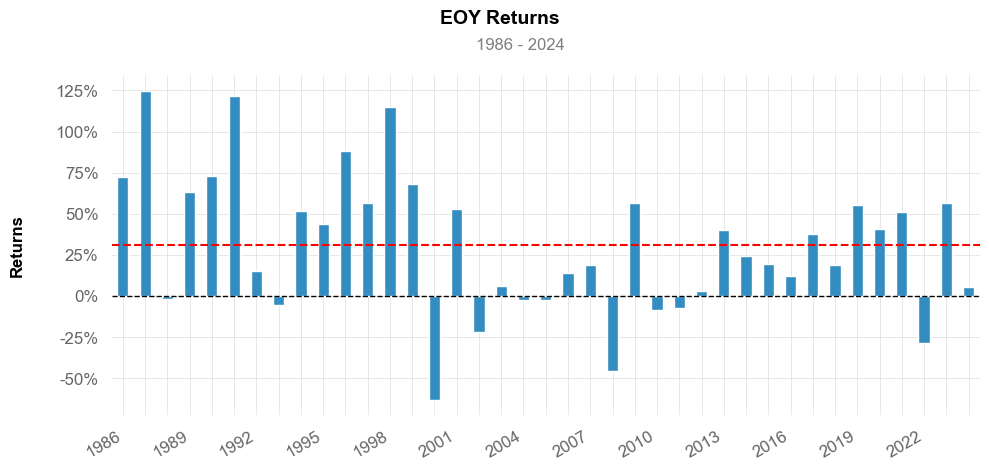

C:\Users\lmosc\AppData\Local\Temp\ipykernel_7316\882749215.py:7: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [11]:
#Yearly Returns

stock = qs.utils.download_returns('MSFT')
qs_yearly_returns = qs.plots.yearly_returns(returns_data)

# Convert daily returns to yearly returns
stock_yearly = stock.resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Calculate the average of the yearly returns
average_yearly_return = stock_yearly.mean()

fig = go.Figure()

# Add the yearly returns plot for the stock as a bar graph
fig.add_trace(go.Bar(x=stock_yearly.index, y=stock_yearly, name='EOY Returns'))

# Add a red dotted line at the average
fig.add_shape(
    type='line',
    x0=stock_yearly.index[0],
    x1=stock_yearly.index[-1],
    y0=average_yearly_return,
    y1=average_yearly_return,
    line=dict(color='Red', dash='dot')
)

# Update layout to show y-axis as percentage
fig.update_layout(
    title='Yearly Returns',
    xaxis_title='Date',
    yaxis_title='Return',
    yaxis=dict(
        tickformat=".0%"
    )
)

fig.show()

[*********************100%%**********************]  1 of 1 completed


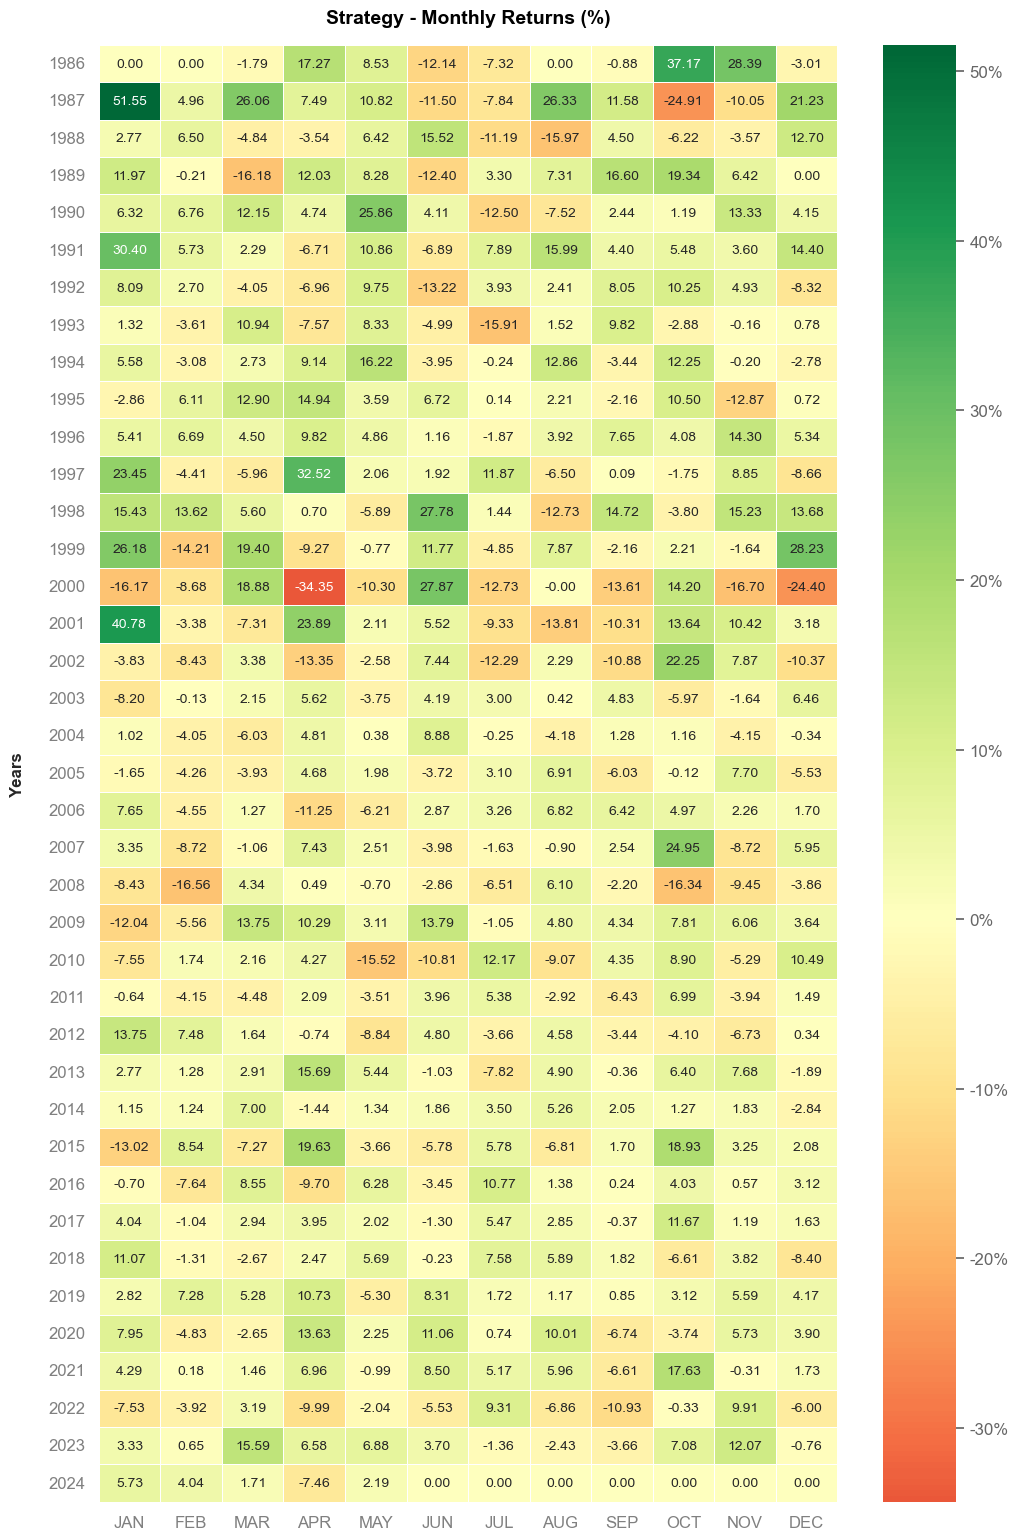

C:\Users\lmosc\AppData\Local\Temp\ipykernel_7316\757459394.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [17]:
#Monthly Heatmap
import pandas as pd

stock = qs.utils.download_returns('MSFT')
qs_heatmap = qs.plots.monthly_heatmap(returns_data)

# Calculate monthly returns
monthly_returns = stock.resample('M').apply(lambda x: (1 + x).prod() - 1)

# Convert the index to a DatetimeIndex if it's not already
if not isinstance(monthly_returns.index, pd.DatetimeIndex):
    monthly_returns.index = pd.to_datetime(monthly_returns.index)

# Extract 'Year' and 'Month' from the index
monthly_returns = monthly_returns.to_frame('Returns')
monthly_returns['Year'] = monthly_returns.index.year
monthly_returns['Month'] = monthly_returns.index.month_name()

# Prepare data for the heatmap
monthly_returns_pivot = monthly_returns.pivot(index='Year', columns='Month', values='Returns')

# Sort the columns to start with January and end with December
monthly_returns_pivot = monthly_returns_pivot[[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]]

# Create the heatmap
heatmap = go.Heatmap(
    z=monthly_returns_pivot.values,
    x=monthly_returns_pivot.columns,
    y=monthly_returns_pivot.index,
    colorscale='RdYlGn', # Color scale from red to yellow to green
    zmin=-0.5, # Minimum value for color scale
    zmax=0.5, # Maximum value for color scale
    hoverongaps=False,
    colorbar=dict(
        title="Return %",
        tickvals=[-0.5, -0.25, 0, 0.25, 0.5],
        ticktext=["-50%", "-25%", "0%", "25%", "50%"]
    )
)

# Create text for each box
annotations = []
for y in range(monthly_returns_pivot.shape[0]):
    for x in range(monthly_returns_pivot.shape[1]):
        annotations.append(go.layout.Annotation(
            xref='x', yref='y',
            x=monthly_returns_pivot.columns[x], y=monthly_returns_pivot.index[y],
            text=f"{monthly_returns_pivot.values[y, x]:.2%}",
            showarrow=False
        ))

# Update layout for better visualization
layout = go.Layout(
    title='Monthly Returns Heatmap for MSFT',
    xaxis_title='Month',
    yaxis_title='Year',
    autosize=True,
    width=1080,
    height=1920,
    annotations=annotations
)

# Show the figure
fig = go.Figure(data=heatmap, layout=layout)
fig.show()

[*********************100%%**********************]  1 of 1 completed

           Date  drawdown
0    1986-03-14  0.000000
1    1986-03-17  0.000000
2    1986-03-18 -0.025432
3    1986-03-19 -0.042380
4    1986-03-20 -0.067802
...         ...       ...
9606 2024-04-26 -0.053683
9607 2024-04-29 -0.063162
9608 2024-04-30 -0.093253
9609 2024-05-01 -0.080187
9610 2024-05-02 -0.073433

[9611 rows x 2 columns]


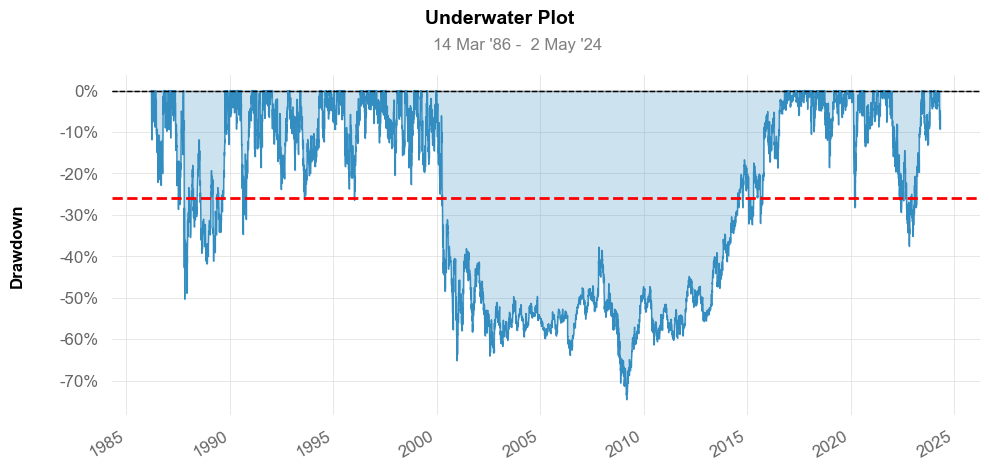

In [92]:
#Drawdowns

# Download returns data
stock = qs.utils.download_returns('MSFT')

# Drop NaN values
stock = stock.dropna()

# Convert returns data into prices
prices = (1 + stock).cumprod()

# Calculate drawdown series
drawdown_series = prices / np.maximum.accumulate(prices) - 1.0
drawdown_series = drawdown_series.replace([np.inf, -np.inf, -0], 0)
drawdown_series = drawdown_series.rename('drawdown')

# Convert drawdown series to DataFrame
drawdown_df = pd.DataFrame(drawdown_series)

# Reset index to get 'Date' as a column
drawdown_df = drawdown_df.reset_index()

# Print drawdown_df
print(drawdown_df)

# Extract the year from 'Date'
drawdown_df['year'] = drawdown_df['Date'].dt.year

# Convert 'drawdown' to percentage
drawdown_df['drawdown %'] = drawdown_df['drawdown'] * 100

# Create a new figure
fig = go.Figure()

# Group the data by year
grouped = drawdown_df.groupby('year')

# Add a scatter trace for the drawdown of each year
for name, group in grouped:
    fig.add_trace(go.Scatter(x=group['Date'], y=group['drawdown %'],
                        mode='lines',
                        name=name))

# Calculate the overall average drawdown
average_drawdown = drawdown_df['drawdown %'].mean()

# Add a red dotted line for the average drawdown
fig.add_shape(
    type="line",
    x0=drawdown_df['Date'].min(),
    y0=average_drawdown,
    x1=drawdown_df['Date'].max(),
    y1=average_drawdown,
    line=dict(
        color="red",
        width=2,
        dash="dot",
    ),
)

# Update the layout to add title and labels, and hide the legend
fig.update_layout(title='Drawdown over Years',
                   xaxis_title='Year',
                   yaxis_title='Drawdown (%)',
                   showlegend=False)

# Show the figure
fig.show()

# Plot the drawdown using QuantStats for comparison
qs_drawdown = qs.plots.drawdown(stock)

[*********************100%%**********************]  1 of 1 completed


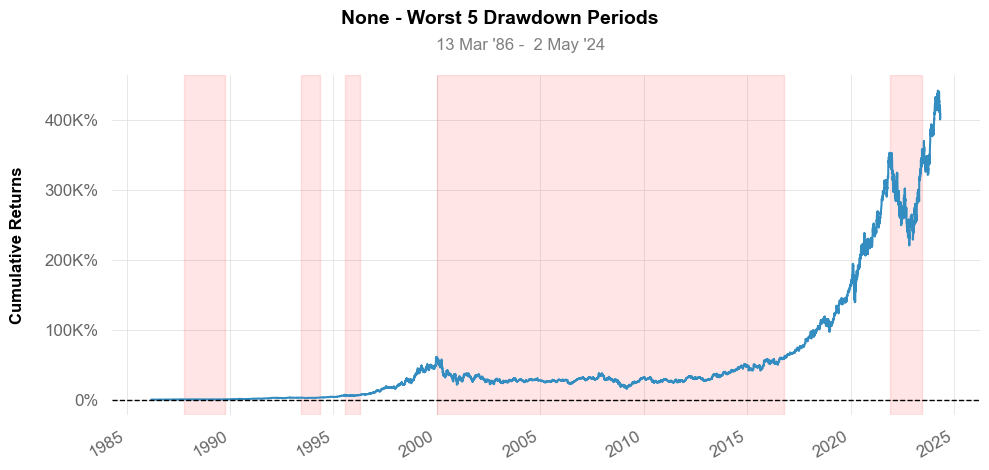

In [109]:
#Drawdowns Periods

# Download returns data
stock = qs.utils.download_returns('MSFT')
qs_drawdown = qs.plots.drawdowns_periods(stock)
# Drop NaN values
stock = stock.dropna()

# Convert returns data into prices
prices = (1 + stock).cumprod()

# Calculate drawdown series
drawdown_series = prices / np.maximum.accumulate(prices) - 1.0
drawdown_series = drawdown_series.replace([np.inf, -np.inf, -0], 0)
drawdown_series = drawdown_series.rename('drawdown')

# Convert drawdown series to DataFrame
drawdown_df = pd.DataFrame(drawdown_series)

# Reset index to get 'Date' as a column
drawdown_df = drawdown_df.reset_index()

# Your provided calculations for drawdowns
drawdown_df = drawdown_df.copy()  # assuming drawdown_df is already defined

# Identify the start of drawdown periods
drawdown_start = (drawdown_df['drawdown'] < 0) & (drawdown_df['drawdown'].shift() >= 0)

# Identify drawdown periods
drawdown_df['drawdown_period'] = drawdown_start.cumsum()

# Calculate min drawdown for each period
drawdown_periods = drawdown_df.groupby('drawdown_period')['drawdown'].min()

# Get the 5 worst drawdown periods
worst_periods = drawdown_periods.nsmallest(5).index

# Get start and end dates for the worst periods
worst_periods_df = drawdown_df[drawdown_df['drawdown_period'].isin(worst_periods)]
start_end_dates = worst_periods_df.groupby('drawdown_period')['Date'].agg(['first', 'last'])

# Your provided code for earnings graph
fig = go.Figure(data=go.Scatter(x=earnings_data.index, y=earnings_data, mode='lines'))

# Add rectangles for the 5 worst drawdown periods
for _, row in start_end_dates.iterrows():
    fig.add_shape(
        type="rect",
        xref="x", yref="paper",
        x0=row['first'], y0=0, x1=row['last'], y1=1,
        fillcolor="red", opacity=0.5, layer="below", line_width=0
    )

fig.update_layout(title='Earnings with Worst Drawdown Periods', xaxis_title='Date', yaxis_title='Cumulative Returns')

# Show the figure
fig.show()

[*********************100%%**********************]  1 of 1 completed


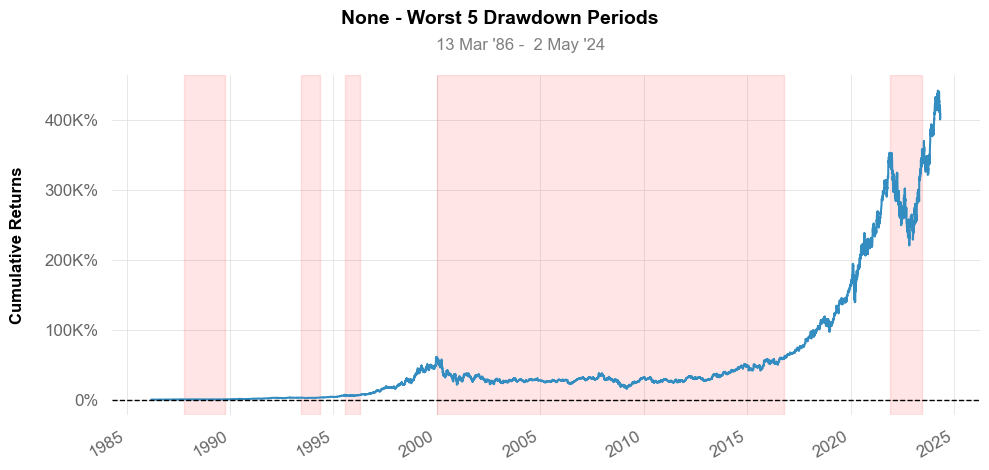

In [106]:
#Drawdown periods attempt 2

# Download returns data
stock = qs.utils.download_returns('MSFT')
qs_drawdown = qs.plots.drawdowns_periods(stock)
# Drop NaN values
stock = stock.dropna()

# Convert returns data into prices
prices = (1 + stock).cumprod()

# Calculate drawdown series
drawdown_series = prices / np.maximum.accumulate(prices) - 1.0
drawdown_series = drawdown_series.replace([np.inf, -np.inf, -0], 0)
drawdown_series = drawdown_series.rename('drawdown')

# Convert drawdown series to DataFrame
drawdown_df = pd.DataFrame(drawdown_series)

# Reset index to get 'Date' as a column
drawdown_df = drawdown_df.reset_index()

# Your provided calculations for drawdowns
drawdown_df = drawdown_df.copy()  # assuming drawdown_df is already defined

# Identify the start of drawdown periods
drawdown_start = (drawdown_df['drawdown'] < 0) & (drawdown_df['drawdown'].shift(1) == 0)

# Identify drawdown periods
drawdown_df['drawdown_period'] = drawdown_start.cumsum()

# Calculate min drawdown for each period
drawdown_periods = drawdown_df.groupby('drawdown_period')['drawdown'].min()

# Get the 5 worst drawdown periods
worst_periods = drawdown_periods.nsmallest(5).index

# Get start and end dates for the worst periods
worst_periods_df = drawdown_df[drawdown_df['drawdown_period'].isin(worst_periods)]
start_end_dates = worst_periods_df.groupby('drawdown_period')['Date'].agg(['first', 'last'])

# Your provided code for earnings graph
fig = go.Figure(data=go.Scatter(x=earnings_data.index, y=earnings_data, mode='lines'))

# Add rectangles for the 5 worst drawdown periods
for _, row in start_end_dates.iterrows():
    fig.add_shape(
        type="rect",
        xref="x", yref="paper",
        x0=row['first'], y0=0, x1=row['last'], y1=1,
        fillcolor="red", opacity=0.5, layer="below", line_width=0
    )

fig.update_layout(title='Earnings with Worst Drawdown Periods', xaxis_title='Date', yaxis_title='Value of $1')

# Show the figure
fig.show()